In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [5]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [6]:
mensual_p = mensual['n_trips']

In [7]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [8]:
mensual_p = mensual_p.reset_index()

In [9]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [316]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.05)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/dr8ypdz0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/sv_the5l.json
01:35:25 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=57742', 'data', 'file=/tmp/tmplnvzjdhf/dr8ypdz0.json', 'init=/tmp/tmplnvzjdhf/sv_the5l.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelez31us4g/prophet_model-20241119013525_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=57742', 'data', 'file=/tmp/tmplnvzjdhf/dr8ypdz0.json', 'init=/tmp/tmplnvzjdhf/sv_the5l.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelez31us4g/prophet_model-20241119013525_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

01:35:27 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=57742', 'data', 'file=/tmp/tmplnvzjdhf/dr8ypdz0.json', 'init=/tmp/tmplnvzjdhf/sv_the5l.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelez31us4g/prophet_model-20241119013525_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelez31us4g/prophet_model-20241119013525_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelez31us4g/prophet_model-20241119013525_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [317]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.834505e+06,2.964005e+06,3.179398e+06,2.770011e+06,2.904361e+06,237959.777444,161018.101427,316068.072711,237959.777444,161018.101427,316068.072711,0.0,0.0,0.0,3.072465e+06
1,2022-04-30,2.822362e+06,2.874426e+06,3.093602e+06,2.764109e+06,2.883021e+06,158540.559546,86528.137194,228402.366895,158540.559546,86528.137194,228402.366895,0.0,0.0,0.0,2.980903e+06
2,2022-05-31,2.808080e+06,2.915513e+06,3.151037e+06,2.757684e+06,2.869790e+06,225413.834984,158316.023507,305855.892719,225413.834984,158316.023507,305855.892719,0.0,0.0,0.0,3.033494e+06
3,2022-06-30,2.794774e+06,2.815570e+06,3.036208e+06,2.750534e+06,2.848201e+06,129880.885521,63972.138076,201494.142156,129880.885521,63972.138076,201494.142156,0.0,0.0,0.0,2.924654e+06
4,2022-07-31,2.780423e+06,2.483967e+06,2.696850e+06,2.738352e+06,2.834135e+06,-193417.584099,-261103.859347,-120863.179009,-193417.584099,-261103.859347,-120863.179009,0.0,0.0,0.0,2.587005e+06
5,2022-08-31,2.764392e+06,2.417389e+06,2.637996e+06,2.723728e+06,2.815255e+06,-238117.181533,-298780.781943,-181491.533762,-238117.181533,-298780.781943,-181491.533762,0.0,0.0,0.0,2.526275e+06
6,2022-09-30,2.746913e+06,2.410789e+06,2.645894e+06,2.702607e+06,2.798873e+06,-218868.929516,-299863.619838,-128862.522833,-218868.929516,-299863.619838,-128862.522833,0.0,0.0,0.0,2.528045e+06
7,2022-10-31,2.726601e+06,2.813283e+06,3.070929e+06,2.681503e+06,2.779859e+06,222509.501804,128132.270350,314736.080893,222509.501804,128132.270350,314736.080893,0.0,0.0,0.0,2.949111e+06
8,2022-11-30,2.706053e+06,2.536335e+06,2.768360e+06,2.659687e+06,2.760132e+06,-48729.379679,-122979.985787,20909.421680,-48729.379679,-122979.985787,20909.421680,0.0,0.0,0.0,2.657323e+06
9,2022-12-31,2.684639e+06,2.597281e+06,2.845294e+06,2.635753e+06,2.735402e+06,38968.867996,-60135.818235,130530.436835,38968.867996,-60135.818235,130530.436835,0.0,0.0,0.0,2.723608e+06


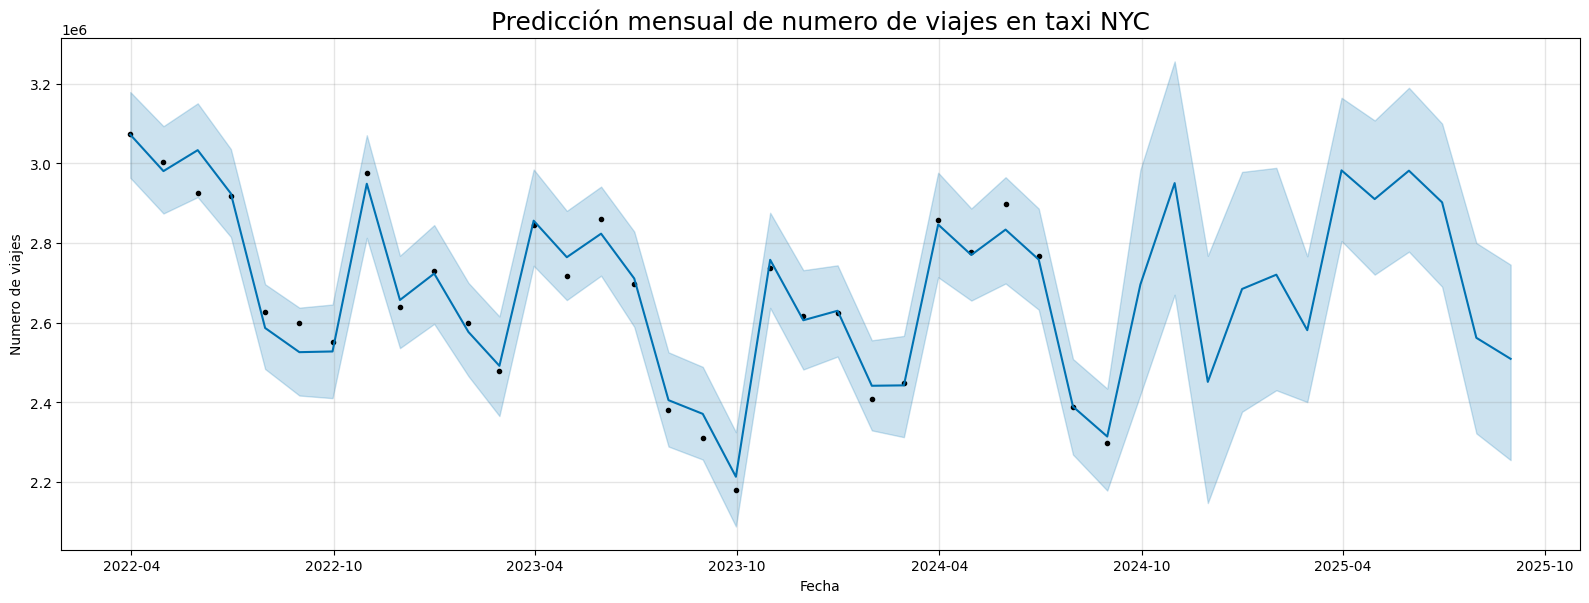

In [318]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

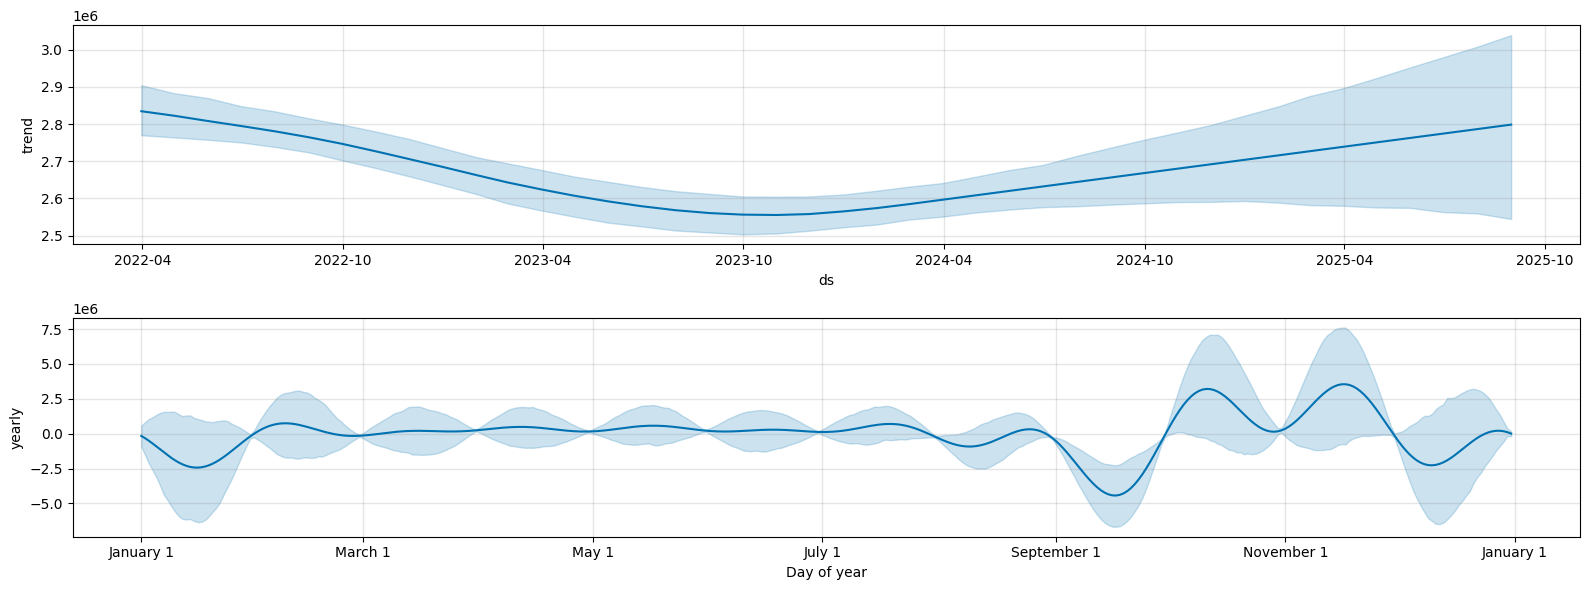

In [319]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [320]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [321]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/kvi9y0kh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/uiskkffe.json
01:35:29 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=42793', 'data', 'file=/tmp/tmplnvzjdhf/kvi9y0kh.json', 'init=/tmp/tmplnvzjdhf/uiskkffe.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelpziz3e8l/prophet_model-20241119013529_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=42793', 'data', 'file=/tmp/tmplnvzjdhf/kvi9y0kh.json', 'init=/tmp/tmplnvzjdhf/uiskkffe.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelpziz3e8l/prophet_model-20241119013529_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

01:35:31 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=42793', 'data', 'file=/tmp/tmplnvzjdhf/kvi9y0kh.json', 'init=/tmp/tmplnvzjdhf/uiskkffe.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelpziz3e8l/prophet_model-20241119013529_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelpziz3e8l/prophet_model-20241119013529_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelpziz3e8l/prophet_model-20241119013529_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [322]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.343483e+06,2.034079e+06,2.647759e+06,2179200,2023-09-01
1,2023-10-31,2.795231e+06,2.421384e+06,3.121461e+06,2736389,2023-09-01
2,2023-11-30,2.465769e+06,2.190684e+06,2.773080e+06,2616757,2023-09-01
3,2023-12-31,2.500728e+06,2.172555e+06,2.826175e+06,2625768,2023-09-01
4,2024-01-31,2.389957e+06,2.024400e+06,2.718971e+06,2409342,2023-09-01
5,2024-02-29,2.367455e+06,1.600534e+06,3.206869e+06,2448952,2023-09-01
6,2024-03-31,2.662036e+06,2.289845e+06,2.997148e+06,2858661,2023-09-01
7,2024-04-30,2.664646e+06,2.237378e+06,3.116292e+06,2777362,2023-09-01
8,2024-05-31,2.271049e+06,1.886915e+06,2.646720e+06,2899539,2023-09-01
9,2024-06-30,2.469187e+06,1.988259e+06,2.952986e+06,2767032,2023-09-01


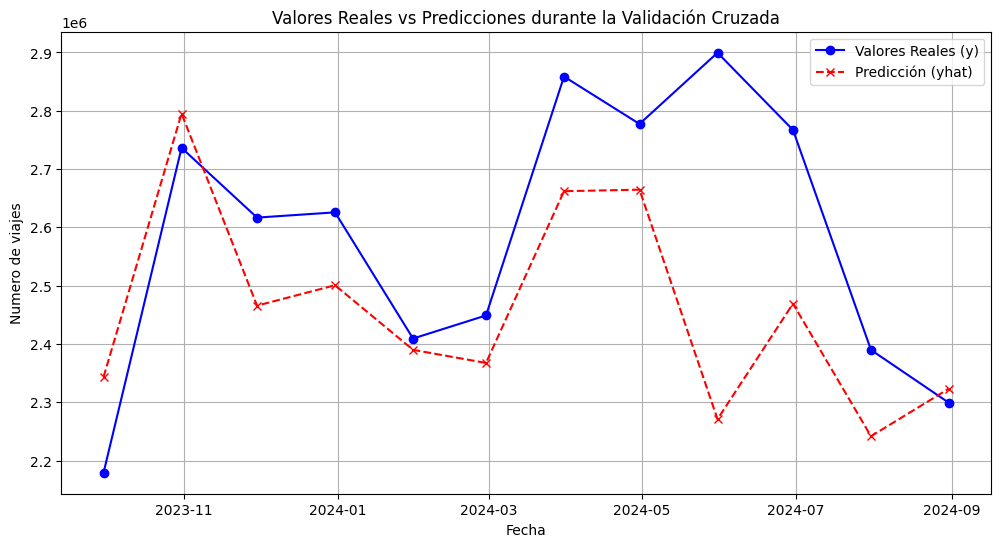

In [323]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


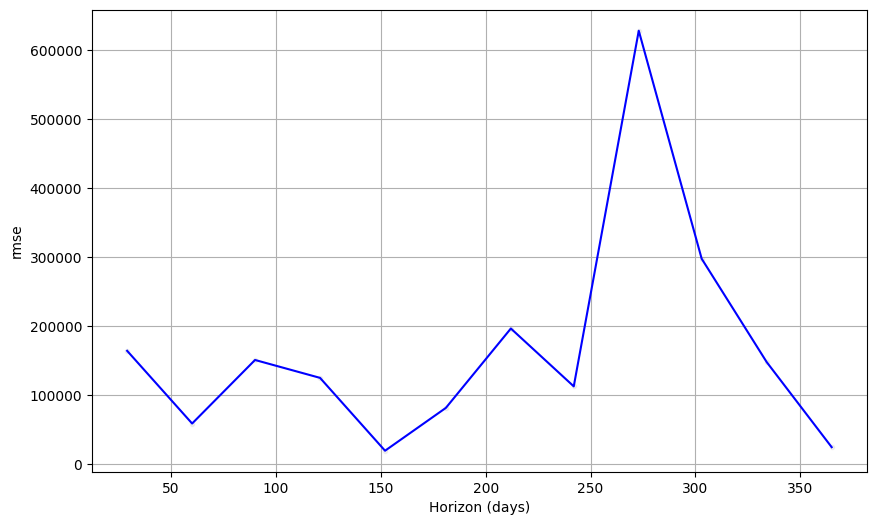

In [324]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [325]:
df_p_1 = performance_metrics(df_cv_1)

In [326]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 167352.06983440308


In [327]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 167352.06983440308


In [328]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [329]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.06249094481901929


In [330]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,5.278983e+10,167352.069834,167352.069834,0.062491,0.062491,0.065673,0.916667
std,109 days 20:33:46.987269072,1.104281e+11,164426.668158,164426.668158,0.056366,0.056366,0.063333,0.288675
min,29 days 00:00:00,3.757709e+08,19384.810308,19384.810308,0.008046,0.008046,0.008078,0.000000
25%,113 days 06:00:00,5.846924e+09,75833.290427,75833.290427,0.030335,0.030335,0.030700,1.000000
50%,196 days 12:00:00,1.876604e+10,136508.321210,136508.321210,0.052660,0.052660,0.054098,1.000000
75%,280 days 12:00:00,2.990704e+10,172368.548428,172368.548428,0.070433,0.070433,0.071586,1.000000
max,365 days 00:00:00,3.949995e+11,628489.859530,628489.859530,0.216755,0.216755,0.243102,1.000000


In [331]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,5.278983e+10,229760.383253,167352.069834,0.062491,0.05266,0.065673,0.916667


In [332]:
#forecast_1.to_csv('forecast_mensual.csv')